In [4]:
import numpy as np
from collections import defaultdict
data = np.loadtxt('ls_hist/final_params.txt')
from pyscf import gto, scf, dft
from pyscf.geomopt import optimize


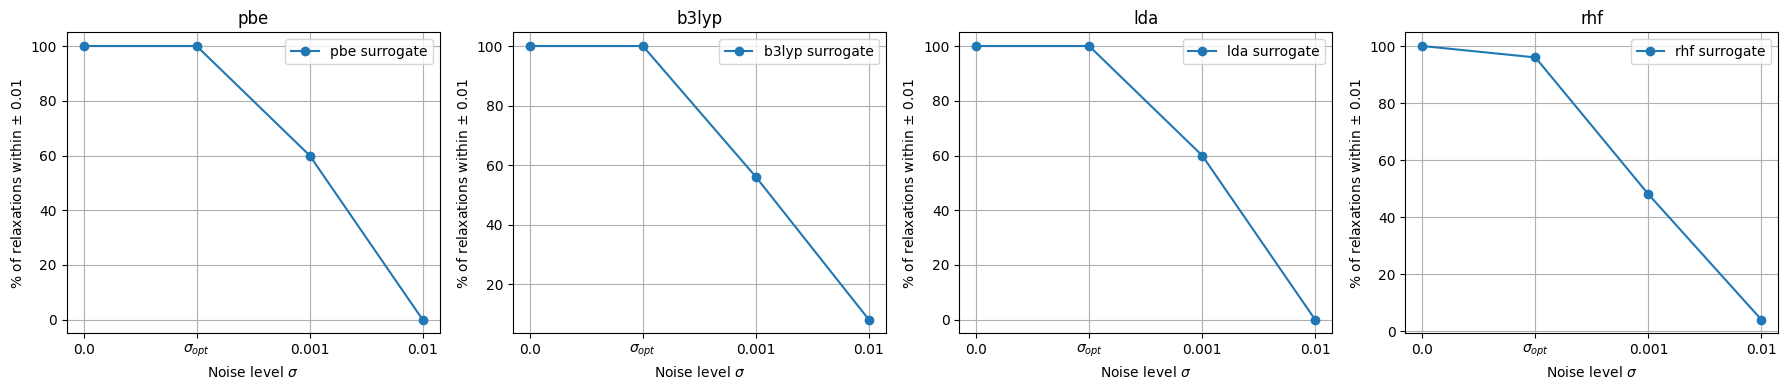

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from params import pes_dict
from run2_surrogate import surrogates

data = np.loadtxt('ls_hist/final_params.txt')
epsilon_p = [0.01, 0.01]
runs_per_config = 25
xc_ls_list = list(pes_dict.keys())

# Original sigmas collection order
sigmas_collected = [0.0, 0.01, 0.001, r'$\sigma_{opt}$']
# Desired x-axis label order
x_labels = [0.0, r'$\sigma_{opt}$', 0.001, 0.01]
x_positions = range(len(x_labels))

fig, axes = plt.subplots(1, 4, figsize=(18, 4))
axes = axes.flatten()

i = 0  # index for slicing data
for ax_idx, xc_srg in enumerate(xc_ls_list):
    ref_params = surrogates['b3lyp'].structure.params
    success_percentages = []

    # collect success percentages in collected sigmas order
    for sig in sigmas_collected:
        runs = data[i*runs_per_config:(i+1)*runs_per_config]
        par0_res = runs[:, 1]
        par1_res = runs[:, 2]

        within_bounds = (
            (np.abs(par0_res - ref_params[0]) <= epsilon_p[0]) &
            (np.abs(par1_res - ref_params[1]) <= epsilon_p[1])
        )
        percent_within = 100 * np.sum(within_bounds) / len(within_bounds)
        success_percentages.append(percent_within)
        i += 1

    # Reorder percentages to match desired x_labels
    label_to_index = {s: idx for idx, s in enumerate(sigmas_collected)}
    reordered_percentages = [success_percentages[label_to_index[l]] for l in x_labels]

    ax = axes[ax_idx]
    ax.plot(x_positions, reordered_percentages, marker='o', label=f'{xc_srg} surrogate')
    ax.set_xticks(x_positions)
    ax.set_xticklabels(x_labels)
    ax.set_xlabel(r'Noise level $\sigma$')
    ax.set_ylabel(r'% of relaxations within $\pm$ 0.01 ')
    ax.set_title(xc_srg)
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.savefig('figures/ls_hist_res.png')
plt.show()


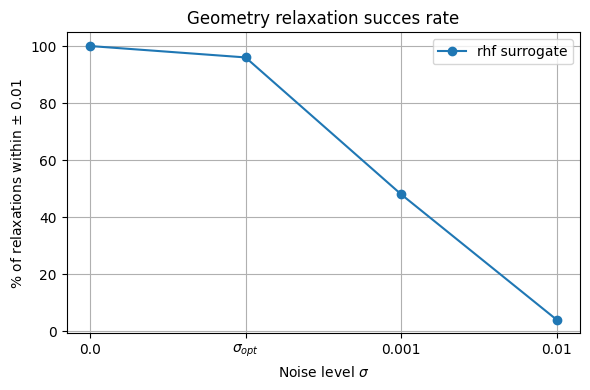

  Optimization complete:
       d    target     error  rel.  
       0    0.0106    0.0067 63.249% 
       1    0.0079    0.0051 65.148% 
       p    target     error  rel.  
       0    0.0100    0.0067 67.197% 
       1    0.0100    0.0052 52.329% 
0.0001990314788228368


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from params import pes_dict
from run2_surrogate import surrogates

data = np.loadtxt('ls_hist/final_params.txt')
epsilon_p = [0.01, 0.01]
runs_per_config = 25
xc_ls_list = list(pes_dict.keys())

# Original sigmas collection order
sigmas_collected = [0.0, 0.01, 0.001, r'$\sigma_{opt}$']
# Desired x-axis label order
x_labels = [0.0, r'$\sigma_{opt}$', 0.001, 0.01]
x_positions = range(len(x_labels))

# --- Only take the last surrogate ---
xc_srg = xc_ls_list[-1]

fig, ax = plt.subplots(figsize=(6, 4))

i = (len(xc_ls_list) - 1) * len(sigmas_collected)  # start index for last surrogate
ref_params = surrogates['b3lyp'].structure.params
success_percentages = []

# collect success percentages in collected sigmas order
for sig in sigmas_collected:
    runs = data[i*runs_per_config:(i+1)*runs_per_config]
    par0_res = runs[:, 1]
    par1_res = runs[:, 2]

    within_bounds = (
        (np.abs(par0_res - ref_params[0]) <= epsilon_p[0]) &
        (np.abs(par1_res - ref_params[1]) <= epsilon_p[1])
    )
    percent_within = 100 * np.sum(within_bounds) / len(within_bounds)
    success_percentages.append(percent_within)
    i += 1

# Reorder percentages to match desired x_labels
label_to_index = {s: idx for idx, s in enumerate(sigmas_collected)}
reordered_percentages = [success_percentages[label_to_index[l]] for l in x_labels]

ax.plot(x_positions, reordered_percentages, marker='o', label=f'{xc_srg} surrogate')
ax.set_xticks(x_positions)
ax.set_xticklabels(x_labels)
ax.set_xlabel(r'Noise level $\sigma$')
ax.set_ylabel(r'% of relaxations within $\pm$ 0.01 ')
ax.set_title("Geometry relaxation succes rate")
ax.grid(True)
ax.legend()

plt.tight_layout()
plt.savefig('figures/ls_hist_res_last.png')
plt.show()
surrogates[xc_srg].optimize(epsilon_p=[0.01,0.01])
print(min(surrogates[xc_srg].sigma_opt))

In [21]:
cobyla = np.mean([2.330000000000000000e+02, 2.570000000000000000e+02,
 2.440000000000000000e+02,
 1.850000000000000000e+02,
 2.450000000000000000e+02])
print(cobyla)
bfgs = np.mean([5.250000000000000000e+02,
 6.500000000000000000e+02,
 6.750000000000000000e+02,
 6.750000000000000000e+02,
 5.250000000000000000e+02])
print(bfgs)

232.8
610.0


In [16]:
mol = gto.M(atom = 'O 0 0 0;O 0 0 -2', basis='sto3g')
mf = scf.RHF(mol)
mol_eq = optimize(mf)

geometric-optimize called with the following command line:
/home/nils/.local/lib/python3.10/site-packages/ipykernel_launcher.py --f=/run/user/1000/jupyter/runtime/kernel-v3053fe442a8541124f7956674636608f6a9391b7d.json

                                        ())))))))))))))))/                     
                                    ())))))))))))))))))))))))),                
                                *)))))))))))))))))))))))))))))))))             
                        #,    ()))))))))/                .)))))))))),          
                      #%%%%,  ())))))                        .))))))))*        
                      *%%%%%%,  ))              ..              ,))))))).      
                        *%%%%%%,         ***************/.        .)))))))     
                #%%/      (%%%%%%,    /*********************.       )))))))    
              .%%%%%%#      *%%%%%%,  *******/,     **********,      .))))))   
                .%%%%%%/      *%%%%%%,  **              *****


Geometry optimization cycle 1
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   O   0.000000   0.000000   0.000000    0.000000  0.000000  0.000000
   O   0.000000   0.000000  -2.000000    0.000000  0.000000  0.000000
converged SCF energy = -147.142641663139
--------------- RHF_Scanner gradients ---------------
         x                y                z
0 O     0.0000000000     0.0000000000     0.2607837466
1 O    -0.0000000000    -0.0000000000    -0.2607837466
----------------------------------------------
cycle 1: E = -147.142641663  dE = -147.143  norm(grad) = 0.368804


Step    0 : Gradient = 2.608e-01/2.608e-01 (rms/max) Energy = -147.1426416631
Hessian Eigenvalues: 5.00000e-02 5.00000e-02 5.00000e-02 ... 5.00000e-02 5.00000e-02 1.00000e-01



Geometry optimization cycle 2
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   O  -0.000000  -0.000000  -0.100000   -0.000000 -0.000000 -0.100000
   O   0.000000   0.000000  -1.900000    0.000000  0.000000  0.100000
converged SCF energy = -147.252086659571
--------------- RHF_Scanner gradients ---------------
         x                y                z
0 O     0.0000000000    -0.0000000000     0.3168383403
1 O    -0.0000000000     0.0000000000    -0.3168383403
----------------------------------------------
cycle 2: E = -147.25208666  dE = -0.109445  norm(grad) = 0.448077


Step    1 : Displace = 1.000e-01/1.000e-01 (rms/max) Trust = 1.000e-01 (=) Grad = 3.168e-01/3.168e-01 (rms/max) E (change) = -147.2520866596 (-1.094e-01) Quality = 1.197
Eigenvalues below 1.0000e-05 (-1.4831e-01) - returning guess
Hessian Eigenvalues: 5.00000e-02 5.00000e-02 5.00000e-02 ... 5.00000e-02 5.00000e-02 1.00000e-01



Geometry optimization cycle 3
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   O  -0.000000   0.000000  -0.241421   -0.000000  0.000000 -0.141421
   O   0.000000  -0.000000  -1.758579    0.000000 -0.000000  0.141421
converged SCF energy = -147.431313129321
--------------- RHF_Scanner gradients ---------------
         x                y                z
0 O    -0.0000000000    -0.0000000000     0.3292561278
1 O     0.0000000000     0.0000000000    -0.3292561278
----------------------------------------------
cycle 3: E = -147.431313129  dE = -0.179226  norm(grad) = 0.465638


Step    2 : Displace = 1.414e-01/1.414e-01 (rms/max) Trust = 1.414e-01 (+) Grad = 3.293e-01/3.293e-01 (rms/max) E (change) = -147.4313131293 (-1.792e-01) Quality = 1.156
Eigenvalues below 1.0000e-05 (-2.3233e-02) - returning guess
Hessian Eigenvalues: 5.00000e-02 5.00000e-02 5.00000e-02 ... 5.00000e-02 5.00000e-02 1.00000e-01



Geometry optimization cycle 4
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   O  -0.000000   0.000000  -0.441421   -0.000000  0.000000 -0.200000
   O   0.000000  -0.000000  -1.558579    0.000000 -0.000000  0.200000
converged SCF energy = -147.520330791566
--------------- RHF_Scanner gradients ---------------
         x                y                z
0 O    -0.0000000000     0.0000000000    -0.3521264121
1 O     0.0000000000    -0.0000000000     0.3521264121
----------------------------------------------
cycle 4: E = -147.520330792  dE = -0.0890177  norm(grad) = 0.497982


Step    3 : Displace = 2.000e-01/2.000e-01 (rms/max) Trust = 2.000e-01 (+) Grad = 3.521e-01/3.521e-01 (rms/max) E (change) = -147.5203307916 (-8.902e-02) Quality = 0.404
Hessian Eigenvalues: 5.00000e-02 5.00000e-02 5.00000e-02 ... 5.00000e-02 5.00000e-02 9.01430e-01



Geometry optimization cycle 5
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   O  -0.000000  -0.000000  -0.338065    0.000000 -0.000000  0.103356
   O   0.000000   0.000000  -1.661935   -0.000000  0.000000 -0.103356
converged SCF energy = -147.531680034866
--------------- RHF_Scanner gradients ---------------
         x                y                z
0 O    -0.0000000000    -0.0000000000     0.1872513121
1 O     0.0000000000     0.0000000000    -0.1872513121
----------------------------------------------
cycle 5: E = -147.531680035  dE = -0.0113492  norm(grad) = 0.264813


Step    4 : Displace = 1.034e-01/1.034e-01 (rms/max) Trust = 2.000e-01 (=) Grad = 1.873e-01/1.873e-01 (rms/max) E (change) = -147.5316800349 (-1.135e-02) Quality = 0.165
Hessian Eigenvalues: 5.00000e-02 5.00000e-02 5.00000e-02 ... 5.00000e-02 5.00000e-02 1.38079e+00



Geometry optimization cycle 6
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   O   0.000000   0.000000  -0.373946    0.000000  0.000000 -0.035881
   O  -0.000000  -0.000000  -1.626054   -0.000000 -0.000000  0.035881
converged SCF energy = -147.549560830408
--------------- RHF_Scanner gradients ---------------
         x                y                z
0 O     0.0000000000     0.0000000000     0.0679624210
1 O    -0.0000000000    -0.0000000000    -0.0679624210
----------------------------------------------
cycle 6: E = -147.54956083  dE = -0.0178808  norm(grad) = 0.0961134


Step    5 : Displace = 3.588e-02/3.588e-02 (rms/max) Trust = 5.168e-02 (-) Grad = 6.796e-02/6.796e-02 (rms/max) E (change) = -147.5495608304 (-1.788e-02) Quality = 1.408
Hessian Eigenvalues: 5.00000e-02 5.00000e-02 5.00000e-02 ... 5.00000e-02 5.00000e-02 8.79633e-01



Geometry optimization cycle 7
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   O  -0.000000  -0.000000  -0.394389   -0.000000 -0.000000 -0.020443
   O   0.000000   0.000000  -1.605611    0.000000  0.000000  0.020443
converged SCF energy = -147.551313465398
--------------- RHF_Scanner gradients ---------------
         x                y                z
0 O     0.0000000000    -0.0000000000    -0.0263587773
1 O    -0.0000000000     0.0000000000     0.0263587773
----------------------------------------------
cycle 7: E = -147.551313465  dE = -0.00175263  norm(grad) = 0.0372769


Step    6 : Displace = 2.044e-02/2.044e-02 (rms/max) Trust = 7.308e-02 (+) Grad = 2.636e-02/2.636e-02 (rms/max) E (change) = -147.5513134654 (-1.753e-03) Quality = 0.668
Hessian Eigenvalues: 5.00000e-02 5.00000e-02 5.00000e-02 ... 5.00000e-02 5.00000e-02 1.22079e+00



Geometry optimization cycle 8
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   O  -0.000000  -0.000000  -0.388676   -0.000000  0.000000  0.005713
   O   0.000000   0.000000  -1.611324    0.000000 -0.000000 -0.005713
converged SCF energy = -147.551569597979
--------------- RHF_Scanner gradients ---------------
         x                y                z
0 O    -0.0000000000     0.0000000000     0.0023136922
1 O     0.0000000000    -0.0000000000    -0.0023136922
----------------------------------------------
cycle 8: E = -147.551569598  dE = -0.000256133  norm(grad) = 0.00327205


Step    7 : Displace = 5.713e-03/5.713e-03 (rms/max) Trust = 7.308e-02 (=) Grad = 2.314e-03/2.314e-03 (rms/max) E (change) = -147.5515695980 (-2.561e-04) Quality = 0.900
Hessian Eigenvalues: 5.00000e-02 5.00000e-02 5.00000e-02 ... 5.00000e-02 5.00000e-02 1.32795e+00



Geometry optimization cycle 9
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   O  -0.000000  -0.000000  -0.389137    0.000000 -0.000000 -0.000461
   O   0.000000   0.000000  -1.610863   -0.000000  0.000000  0.000461
converged SCF energy = -147.551571676714
--------------- RHF_Scanner gradients ---------------
         x                y                z
0 O     0.0000000000    -0.0000000000     0.0000704817
1 O    -0.0000000000     0.0000000000    -0.0000704817
----------------------------------------------
cycle 9: E = -147.551571677  dE = -2.07874e-06  norm(grad) = 9.96761e-05


Step    8 : Displace = 4.610e-04/4.610e-04 (rms/max) Trust = 1.034e-01 (+) Grad = 7.048e-05/7.048e-05 (rms/max) E (change) = -147.5515716767 (-2.079e-06) Quality = 1.031
Hessian Eigenvalues: 5.00000e-02 5.00000e-02 5.00000e-02 ... 5.00000e-02 5.00000e-02 1.28750e+00



Geometry optimization cycle 10
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   O  -0.000000  -0.000000  -0.389152   -0.000000  0.000000 -0.000014
   O   0.000000   0.000000  -1.610848    0.000000 -0.000000  0.000014
converged SCF energy = -147.551571678639
--------------- RHF_Scanner gradients ---------------
         x                y                z
0 O    -0.0000000000    -0.0000000000    -0.0000001813
1 O     0.0000000000     0.0000000000     0.0000001813
----------------------------------------------
cycle 10: E = -147.551571679  dE = -1.92497e-09  norm(grad) = 2.5641e-07


Step    9 : Displace = 1.448e-05/1.448e-05 (rms/max) Trust = 1.462e-01 (+) Grad = 1.813e-07/1.813e-07 (rms/max) E (change) = -147.5515716786 (-1.925e-09) Quality = 0.998
Hessian Eigenvalues: 5.00000e-02 5.00000e-02 5.00000e-02 ... 5.00000e-02 5.00000e-02 1.28750e+00
Converged! =D

    #==========================================================================#
    #| If this code has benefited your research, please support us by citing: |#
    #|                                                                        |#
    #| Wang, L.-P.; Song, C.C. (2016) "Geometry optimization made simple with |#
    #| translation and rotation coordinates", J. Chem, Phys. 144, 214108.     |#
    #| http://dx.doi.org/10.1063/1.4952956                                    |#
    #==========================================================================#
    Time elapsed since start of run_optimizer: 1.109 seconds


[<stalk.pls.ParallelLineSearch.ParallelLineSearch object at 0x7f42ce72f070>, <stalk.pls.ParallelLineSearch.ParallelLineSearch object at 0x7f42ce72e410>, <stalk.pls.ParallelLineSearch.ParallelLineSearch object at 0x7f42ce72ffd0>, <stalk.pls.ParallelLineSearch.ParallelLineSearch object at 0x7f42ce736230>, <stalk.pls.ParallelLineSearch.ParallelLineSearch object at 0x7f42c08c93f0>]
Computing: eqm (b3lyp)
Computing: eqm (b3lyp)
Line-search (b3lyp) on pbe surrogate with _005_005 epsilons and 4 evaluations:
Computing: eqm (b3lyp)
Computing: eqm (b3lyp)
Computing: eqm (b3lyp)
LineSearchIteration
   pls    Energy                  p0                  p1           
     0  -17.1581 +/- 0.0000    0.9701 +/- 0.0000    1.8040 +/- 0.0000 
     1  -17.1582 +/- 0.0000    0.9646 +/- 0.0000    1.8162 +/- 0.0000 
     2  -17.1582 +/- 0.0000    0.9638 +/- 0.0000    1.8153 +/- 0.0000 
     3  -17.1582 +/- 0.0000    0.9636 +/- 0.0000    1.8153 +/- 0.0000 
     4  -17.1582 +/- 0.0000    0.9636 +/- 0.0000    1

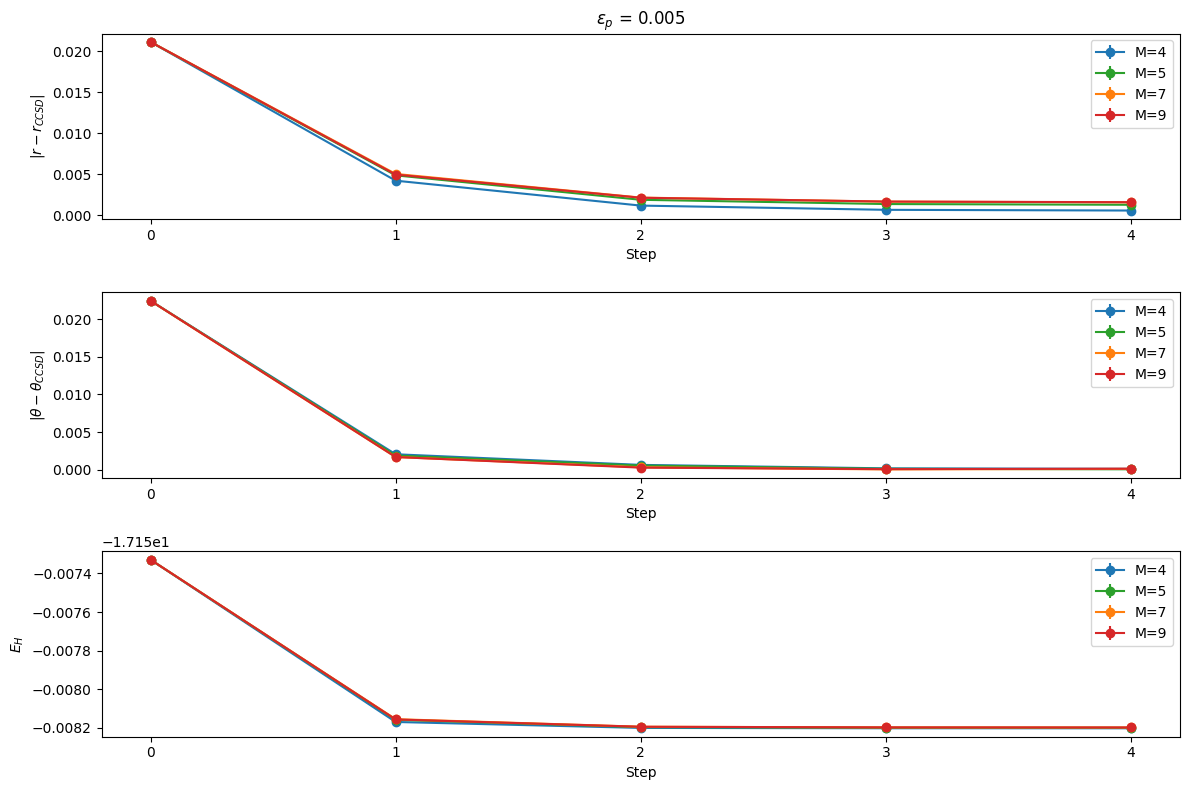

In [31]:
#!/usr/bin/env python3

import numpy as np
from matplotlib import pyplot as plt
from matplotlib import patches
import os

from stalk import LineSearchIteration

from params import pes_dict, co_dict
from run2_surrogate import surrogates


lsis = {}
M_list = [4, 5, 7, 9]
epsilon_p = [[0.005, 0.005]]

for xc_srg, pes_srg in pes_dict.items():
    lsis[xc_srg] = {}
    xc_ls = 'b3lyp'
    pes_ls = pes_dict[xc_ls]
    structure = surrogates[xc_srg].structure.copy()
    
    if xc_srg == xc_ls:
        structure.shift_params([0.1, -0.1])

    for eps in epsilon_p:
        eps_str = ''.join(f'_{int(e * 1000):03d}' for e in eps)
        lsis[xc_srg][eps_str] = {}
        for M in M_list:

            path = f'ls_conv_m{M}/{xc_srg}-{xc_ls}-{eps_str}'

            # surrogates[xc_srg].optimize(epsilon_p=eps) not necessary when plotting

            lsi = LineSearchIteration(
                surrogate=surrogates[xc_srg],
                structure=structure,
                path=path,
                pes=pes_ls,
            )

            for i in range(4):
                lsi.propagate(i, add_sigma=False)

            # Evaluate the latest eqm structure
            print(lsi.pls_list)
            lsi.pls().evaluate_eqm(add_sigma=False)
            lsi.pls(0).evaluate_eqm(add_sigma=False)

            print(f'Line-search ({xc_ls}) on {xc_srg} surrogate with {eps_str} epsilons and {M} evaluations:')
            for pls in lsi.pls_list:
                if pls.evaluated:
                    if pls.structure.value == None:
                        pls.evaluate_eqm(add_sigma=False)
                    
            print(lsi)
            print(surrogates[xc_ls].structure.params)
            print('^^Reference params^^')

            # Now safe to assign
            lsis[xc_srg][eps_str][f'{M}'] = lsi


# Plot
if __name__ == '__main__':

    M_colors = ['tab:blue', 'tab:green', 'tab:orange', 'tab:red']

    xc_srg = 'rhf'


    # Subplots: n_params rows + 1 row for energy, columns = len(epsilon_p)
    fig, axs = plt.subplots(3, 1, figsize=(12, 8))

    ref_params = surrogates[xc_ls].structure.params

    axs = axs.flatten()

    ax_params_list = [axs[0], axs[1]]  # one subplot per parameter
    ax_energy = axs[2]        # bottom row: energy

    for m_idx, (M, color) in enumerate(zip(M_list, M_colors)):
        eps_str = ''.join(f'_{int(e * 1000):03d}' for e in eps)
        lsi = lsis[xc_srg][eps_str][f'{M}']

        # Collect data
        params = [lsi.pls(0).structure.params]
        params_err = [lsi.pls(0).structure.params_err]
        energies = []
        energies_err = []
        for pls in lsi.pls_list:
            energies.append(pls.structure.value)
            energies_err.append(pls.structure.error)
            if pls.evaluated:
                params.append(pls.structure_next.params)
                params_err.append(pls.structure_next.params_err)

        params = abs(np.array(params) - ref_params)
        params_err = np.array(params_err)
        energies = np.array(energies)
        energies_err = np.array(energies_err)
        energies_err = np.array([0.0 if e is None else e for e in energies_err], dtype = float)
        energies = np.array([0.0 if e is None else e for e in energies], dtype = float)

        # Plot each parameter separately vs step with error bars
        for p_idx, ax in enumerate(ax_params_list):
            label = f'M={M}'
            ax.errorbar(
                np.arange(len(params)),
                params[:, p_idx],
                yerr=params_err[:, p_idx],
                marker='o',
                linestyle='-',
                color=color,
                label=label
            )
            ax.set_xticks(np.arange(5))
            if p_idx ==0:
                ax.set_ylabel(r'$|r-r_{CCSD}|$')
            else:
                ax.set_ylabel(r'$|\theta-\theta_{CCSD}|$')
            ax.set_xlabel('Step')
            if p_idx == 0:
                ax.set_title(rf"$\epsilon_p$ = {eps[0]:.3f}")

        # Plot energy vs step
        label_energy = f'M={M}'
        if energies_err is not None:
            ax_energy.errorbar(
                np.arange(len(energies)), energies, yerr=energies_err,
                marker='o', linestyle='-', color=color, label=label_energy
            )
            ax_energy.set_xticks(np.arange(5))
        else:
            ax_energy.errorbar(
                np.arange(len(energies)), energies,
                marker='o', linestyle='-', color=color, label=label_energy
            )
        ax_energy.set_ylabel(r'$E_H$')
        ax_energy.set_xlabel('Step')

    
    for ax in list(ax_params_list) + [ax_energy]:
        ax.legend()

plt.tight_layout()
os.makedirs('figures_m',exist_ok=True )
plt.savefig(f'figures_m/{xc_srg}-surrogate.png')